In [1]:
# Daily Data is from: NCEP Climate Forecast System Reanalysis (CFSR) 6-hourly Products, January 1979 to December 2010
# Monthly and Anual data is from: NCEP Climate Forecast System Reanalysis (CFSR) Monthly Products, January 1979 to December 2010

# https://rda.ucar.edu/#!lfd?nb=y&b=proj&v=NCEP%20Climate%20Forecast%20System%20Reanalysis

In [2]:
import xarray as xr
from cartopy import crs
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib
from faceted import faceted as fc
from cmocean import cm
import numpy as np
import seaborn as sns
import matplotlib.gridspec as gridspec
import pandas as pd
import scipy as sp

%matplotlib inline

In [3]:
olr = xr.open_dataset('/home/bmckim/Downloads/clear_olr_19810322_19810323_0.5by0.5_6hr.nc').CSULF_L8_Avg_1.mean('time')
ts = xr.open_dataset('/home/bmckim/Downloads/surf_temp_19810322_19810323_0.5by0.5_6hr.nc').TMP_L1.mean('time')
q = xr.open_dataset('/home/bmckim/Downloads/q_19810322_19810323_0.5by0.5_6hr.nc').SPF_H_L100.mean('time')
temp = xr.open_dataset('/home/bmckim/Downloads/temp_19810322_19810323_05by0.5_6hr.nc').TMP_L100.mean('time')
ttp = temp.sel(level0=20)
# rh = xr.open_dataset('/home/bmckim/Downloads/pgbhnl.gdas.19810321-19810325.grb2(3).nc').R_H_L100.mean(('level0','time'))
rh = xr.open_dataset('/home/bmckim/Downloads/rh_tentative.nc').__xarray_dataarray_variable__

In [4]:
# L = 2.5 * 10**6
# R = 461.52
# To = 273.15
# qsat = 0.622 * 6.11 * xr.ufuncs.exp(L/R * (1/To - 1/temp)) / temp.level0
# wvpsat = qsat.integrate('level0')
# wvp = q.integrate('level0')
# RH = 100 * wvp/wvpsat
# RH.to_netcdf('/home/bmckim/Downloads/rh_tentative.nc')

In [17]:
lrot = 56*100
lvr = 40*100
h = 6.6*10**-34
c = 3*10**8
kb = 1.38*10**-23
rh_ref = 80

def B(nu,T):
    return 2 * h * c**2 * nu**3 / (np.exp(h * c * nu / (kb*T)) - 1)

def F(Ts,Ttp,rh):
    return - np.pi * np.log(rh/rh_ref) * (lrot * (B(800*100,Ts) - B(150*100,Ttp)) + lvr * (B(1200*100,Ts) - B(1500*100,Ttp)))

In [6]:
f = F(ts,ttp,rh)
a = np.zeros((259920,4))
a[:,0] = np.ndarray.flatten(ts.values)
a[:,1] = np.ndarray.flatten(olr.values)
a[:,2] = np.ndarray.flatten(rh.values)
a[:,3] = np.ndarray.flatten(f.values)
df = pd.DataFrame(a,columns=['T_s','OLR','RH','F'])

/home/bmckim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':
/home/bmckim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()
/home/bmckim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


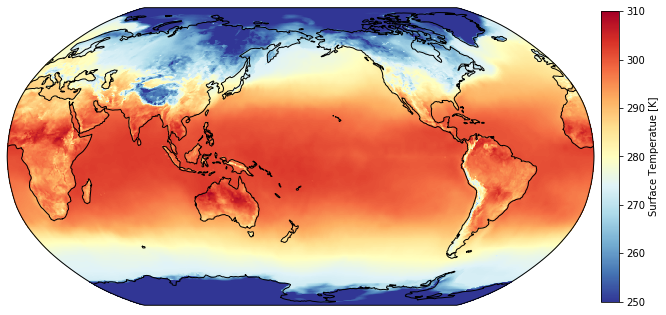

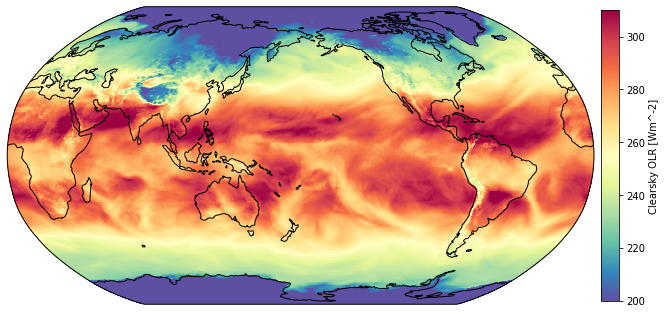

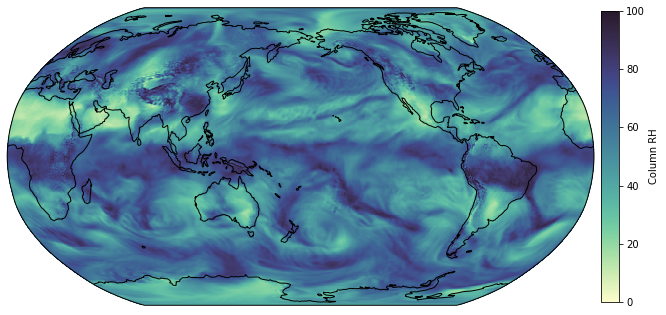

In [7]:
proj=ccrs.Robinson(central_longitude=180)
trans=ccrs.PlateCarree()

fig, ax, cax = fc(1, 1, width=9, cbar_mode='single', cbar_size=0.25,cbar_pad=0.1, cbar_location='right',cbar_short_side_pad=0.5,axes_kwargs={'projection': proj})
plot = ts.plot(ax=ax[0], transform=trans,add_colorbar=False,cmap='RdYlBu_r',vmin=250,vmax=310)
ax[0].coastlines()
ax[0].set_title('')
plt.colorbar(plot, cax=cax, orientation='vertical', label='Surface Temperatue [K]')
fig.show()

fig, ax, cax = fc(1, 1, width=9,cbar_mode='single', cbar_size=0.25,cbar_pad=0.1, cbar_location='right',cbar_short_side_pad=0.5,axes_kwargs={'projection': proj})
plot = olr.plot(ax=ax[0], transform=trans,add_colorbar=False,cmap='Spectral_r',vmax=310,vmin=200)
ax[0].coastlines()
ax[0].set_title('')
plt.colorbar(plot, cax=cax, orientation='vertical', label='Clearsky OLR [Wm^-2]')
fig.show()

fig, ax, cax = fc(1, 1, width=9,cbar_mode='single', cbar_size=0.25,cbar_pad=0.1, cbar_location='right',cbar_short_side_pad=0.5,axes_kwargs={'projection': proj})
plot = rh.plot(ax=ax[0], transform=trans,add_colorbar=False,cmap=cm.deep,vmax=100,vmin=0)
ax[0].coastlines()
ax[0].set_title('')
plt.colorbar(plot, cax=cax, orientation='vertical', label='Column RH')
fig.show()

/home/bmckim/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


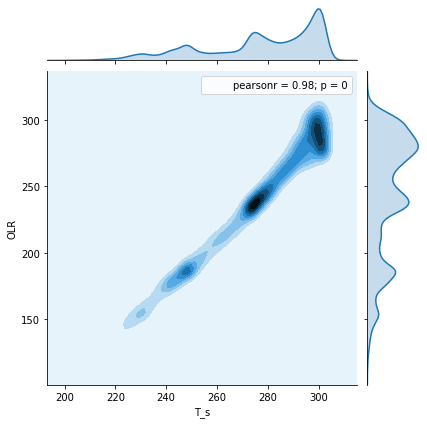

In [8]:
sns.jointplot(x=df['T_s'], y=df['OLR'], data=df, kind='kde', stat_func=sp.stats.pearsonr)

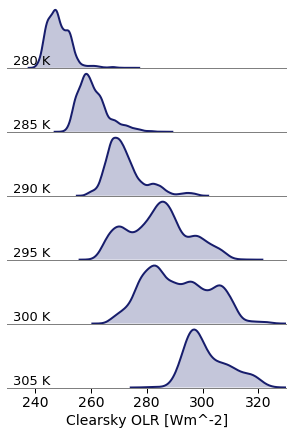

In [9]:
sns.set_context("paper", rc={"font.size":14,"axes.titlesize":14,"axes.labelsize":14})   
def ax_settings(ax, var_name, x_min, x_max):
    ax.set_xlim(x_min,x_max)
    ax.set_yticks([])
    
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    ax.spines['bottom'].set_edgecolor('grey')
    ax.spines['bottom'].set_linewidth(1)
    
    ax.text(0.02, 0.05, var_name, fontsize=13, transform = ax.transAxes) 
    return None

features = ['280', '285', '290', '295', '300','305']
num = len(features)

fig = plt.figure(figsize=(5,7))
gs = gridspec.GridSpec(nrows=num, 
                       ncols=1, 
                       figure=fig, 
                       width_ratios= [3],
                       height_ratios= [1]*num,
                       wspace=0.2, hspace=.05
                      )

ax = [None]*(num + 1)
for i in range(num):
    ax[i] = fig.add_subplot(gs[i, 0])
    
    ax_settings(ax[i],str(features[i]) + ' K', 230, 330)    
    
    a = sns.distplot(olr.where(ts>int(features[i])).where(ts<int(features[i])+1),
            ax=ax[i], hist=False, kde_kws={"shade": True,'lw':2},color='#171d6c')
    
    if i < (num - 1): 
        ax[i].set_xticks([])
    else:
        for tick in ax[i].xaxis.get_major_ticks():
            tick.label.set_fontsize(14) 
            ax[i].set(xlabel='Clearsky OLR [Wm^-2]')

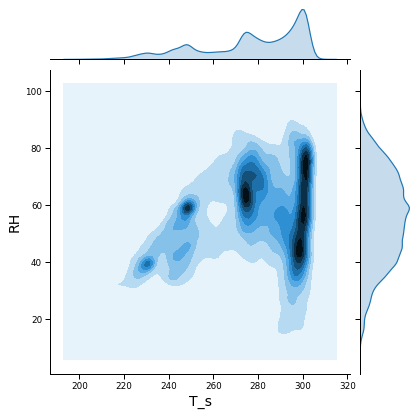

In [10]:
# cmap = sns.cubehelix_palette(8, start=.5, rot=-.75, as_cmap=True)
sns.jointplot(x=df['T_s'], y=df['RH'], data=df, kind="kde");

In [27]:
tmin, tmax = (300,301)

olr_sub = olr.where(ts>tmin).where(ts<tmax)
rh_sub = rh.where(ts>tmin).where(ts<tmax)
ts_sub = ts.where(ts>tmin).where(ts<tmax)
ttp_sub = ttp.where(ts>tmin).where(ts<tmax)

f_sub = F(ts_sub,ttp_sub,rh_sub)
a = np.zeros((259920,4))
a[:,0] = np.ndarray.flatten(ts_sub.values)
a[:,1] = np.ndarray.flatten(olr_sub.values)
a[:,2] = np.ndarray.flatten(rh_sub.values)
a[:,3] = np.ndarray.flatten(f_sub.values)
df = pd.DataFrame(a,columns=['T_s','OLR','RH','F'])

/home/bmckim/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


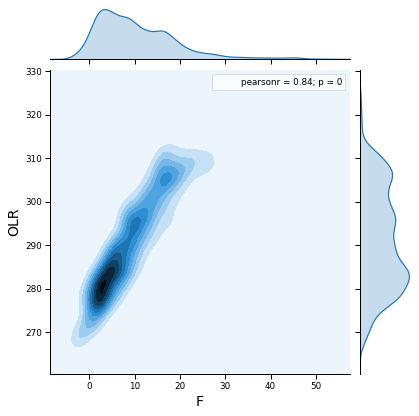

In [28]:
sns.jointplot(x=df['F'], y=df['OLR'], data=df, kind="kde", stat_func=sp.stats.pearsonr);